<a href="https://colab.research.google.com/github/azwarerizal/python_pandas/blob/main/Python_SQL_and_Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import data

In [ ]:
import pandas as pd
import io
from google.colab import files

uploaded = files.upload()
df_ecomm = pd.read_csv(io.BytesIO(uploaded['ecommerce_event.csv']))

In [ ]:
uploaded2 = files.upload()
df_user = pd.read_csv(io.BytesIO(uploaded2['user_profile.csv']))


Saving user_profile.csv to user_profile (1).csv


In [ ]:
df_user.head()

,user_id,gender,age
0,548757053,Female,28
1,512471699,Female,52
2,548430364,Female,65
3,558364479,Female,38
4,514732843,Male,74


In [ ]:
from sqlalchemy import create_engine

engine = create_engine('sqlite:///:memory:')
df_ecomm.to_sql('ecommerce', engine)
df_user.to_sql('user_profile', engine)

### SQL

In [ ]:
pd.read_sql( "SELECT * FROM ecommerce limit 10 ;", engine)

,index,event_date,event_type,product_id,category,subcategory,brand,price,user_id,user_session
0,0,2019-10-23,view,1600600,computers,peripherals,hp,148.04,548757053,7b5e86eb-6c9f-4862-b9cb-20b773d64a75
1,1,2019-10-28,view,1004238,electronics,smartphone,apple,1243.79,512471699,7b21fd53-8f8d-44f7-b126-fcb63b4a34df
2,2,2019-10-31,view,1004566,electronics,smartphone,huawei,164.88,548430364,2e5a410f-0d20-41c9-82c1-aa1b4dcdd11d
3,3,2019-10-12,view,1003310,electronics,smartphone,apple,696.13,558364479,587402bb-2083-4a8c-a874-f270e3408db1
4,4,2019-10-28,view,4804295,electronics,audio,xiaomi,22.86,514732843,52ae3808-c842-4fbd-97a4-ea7c862aef35
5,5,2019-10-07,view,1005139,electronics,smartphone,apple,2110.45,522360414,dcbd9c4e-eb4b-42a2-8cc2-d6e2e561b780
6,6,2019-10-17,view,5000690,appliances,sewing_machine,chayka,91.89,515896815,6e648f36-23f3-4cc0-93f1-b09eb29abe78
7,7,2019-10-31,view,2800627,appliances,kitchen,leadbros,248.40,516050989,962b7c1c-3f6d-4cfa-b0c6-7116ff5f12cd
8,8,2019-10-14,cart,1004750,electronics,smartphone,samsung,196.80,559982276,24827823-b5cd-4f98-9c6c-6c835cc9c7ee
9,9,2019-10-24,view,42300006,furniture,living_room,sv,177.10,556782976,05614727-10a3-4a10-8ad4-2accb6cde8df


In [ ]:
pd.read_sql( """ 
SELECT event_date, event_type, brand, price
FROM ecommerce 
WHERE 
  brand = 'apple' 
  and price >= 500
limit 10 ; 
""", engine)

In [ ]:
pd.read_sql( ''' 
SELECT 
  event_date, 
  brand ,
  count(distinct user_session) num_session
FROM ecommerce
WHERE 
  subcategory = 'smartphone'
group by event_date, brand
order by event_date, num_session desc;
''', engine)



In [ ]:
pd.read_sql( "SELECT * FROM user_profile limit 10 ;", engine) 


,index,user_id,gender,age
0,0,548757053,Female,28
1,1,512471699,Female,52
2,2,548430364,Female,65
3,3,558364479,Female,38
4,4,514732843,Male,74
5,5,522360414,Male,60
6,6,515896815,Female,71
7,7,516050989,Female,72
8,8,559982276,Male,68
9,9,556782976,Female,41


In [ ]:
pd.read_sql( ''' 
SELECT 
  gender,
  brand,
  count(distinct user_session) num_session
FROM ecommerce e 
join user_profile u on e.user_id = u.user_id
WHERE 
  brand like 'a%'
group by gender, brand
order by gender, num_session desc;
''', engine)


,gender,brand,num_session
0,Female,apple,1484
1,Female,acer,148
2,Female,artel,92
3,Female,asus,70
4,Female,atlant,28
...,...,...,...
115,Male,author,1
116,Male,autoprofi,1
117,Male,ava,1
118,Male,avatar,1


In [ ]:
pd.read_sql( ''' 
SELECT 
  category,
  subcategory,
  count(distinct e.user_id) num_user
FROM ecommerce e 
join user_profile u on e.user_id = u.user_id
WHERE 
  event_date <= '2019-10-10'
group by  category, subcategory
having num_user > 100
order by num_user desc;
''', engine)

,category,subcategory,num_user
0,electronics,smartphone,2595
1,appliances,kitchen,676
2,electronics,audio,383
3,electronics,clocks,275
4,computers,notebook,272
5,auto,accessories,245
6,appliances,environment,216
7,electronics,video,212
8,apparel,shoes,165
9,construction,tools,118


### Data Viz

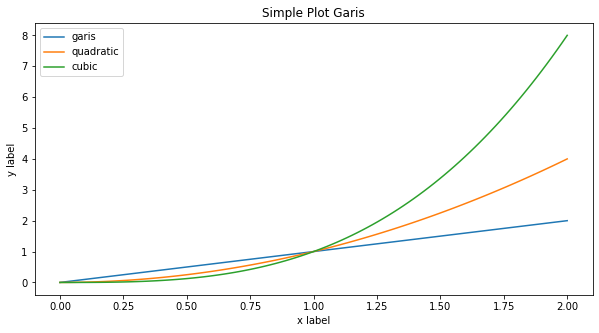

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0, 2, 100)  # Sample data.

fig, ax = plt.subplots(figsize=(10, 5)) #declare the figure and axes
ax.plot(x, x, label='garis')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot Garis")  # Add a title to the axes.
ax.legend();  # Add a legend.


In [ ]:
df_ecomm_daily =df_ecomm.loc[df_ecomm['event_type'] == 'purchase'].groupby('event_date', as_index = False).agg(
    {'product_id': 'nunique',
     'price': 'sum',
     'user_id': 'nunique'}
).sort_values('event_date')

df_ecomm_daily.columns = ['event_date', 'num_product', 'revenue', 'num_users']



In [ ]:
df_ecomm_daily.head()

,event_date,num_product,revenue,num_users
0,2019-10-01,6,3198.20,6
1,2019-10-02,7,1539.91,8
2,2019-10-03,12,3532.24,12
3,2019-10-04,19,5926.47,21
4,2019-10-05,15,4729.19,15


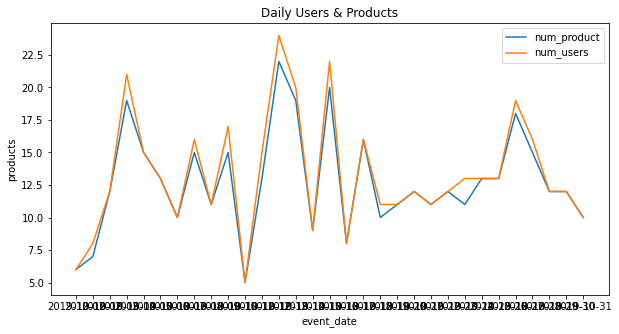

In [ ]:
# Line Chart

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(df_ecomm_daily['event_date'], df_ecomm_daily['num_product'], label='num_product')  
ax.plot(df_ecomm_daily['event_date'], df_ecomm_daily['num_users'], label='num_users')  

ax.set_xlabel('event_date')  
ax.set_ylabel('products')  
ax.set_title("Daily Users & Products") 
ax.legend();  


Text(0.5, 1.0, 'Daily revenue')

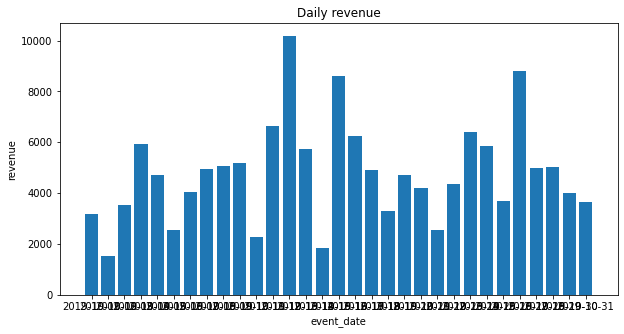

In [ ]:
# Bar Chart

fig, ax = plt.subplots(figsize=(10, 5)) 
ax.bar(df_ecomm_daily['event_date'], df_ecomm_daily['revenue'], label='revenue')  

ax.set_xlabel('event_date')  
ax.set_ylabel('revenue')  
ax.set_title("Daily revenue")  

Text(0.5, 1.0, 'revenue x num_product')

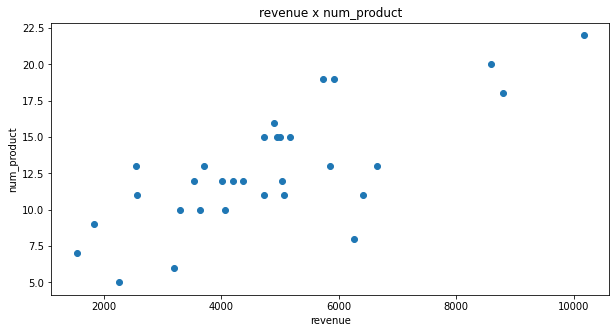

In [ ]:
#scatter plot
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.scatter(df_ecomm_daily['revenue'], df_ecomm_daily['num_product'])  

ax.set_xlabel('revenue')  
ax.set_ylabel('num_product')  
ax.set_title("revenue x num_product")  


Text(0.5, 1.0, 'price distribution')

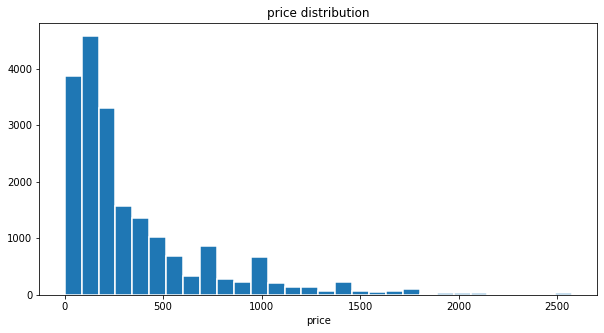

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.hist(df_ecomm['price'], bins=30, linewidth=1.5, edgecolor="white")  

ax.set_xlabel('price')  
ax.set_title("price distribution")  



Text(0.5, 1.0, 'price distribution')

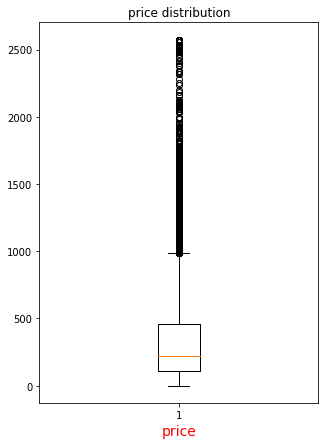

In [ ]:
fig, ax = plt.subplots(figsize=(5, 7)) 
ax.boxplot(df_ecomm['price'])  

ax.set_xlabel('price',  fontsize=14, color='red')  
ax.set_title("price distribution")  



In [ ]:
df_ecomm_daily.head()

,event_date,num_product,revenue,num_users
0,2019-10-01,6,3198.20,6
1,2019-10-02,7,1539.91,8
2,2019-10-03,12,3532.24,12
3,2019-10-04,19,5926.47,21
4,2019-10-05,15,4729.19,15


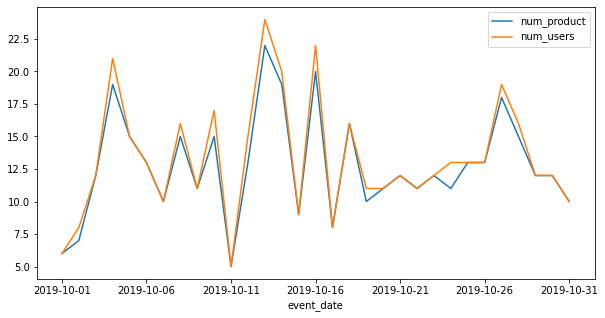

In [ ]:
df_ecomm_daily.plot.line(x='event_date', y=['num_product', 'num_users'], figsize=(10, 5))

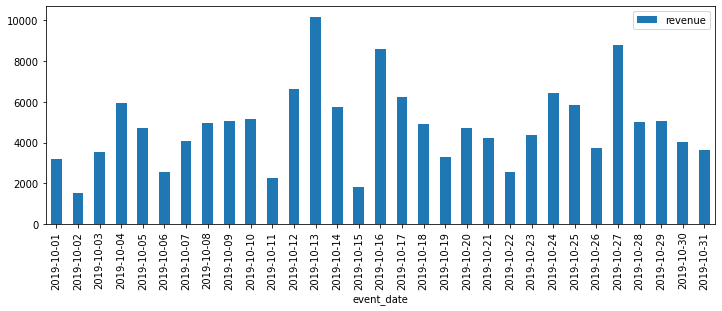

In [ ]:
df_ecomm_daily.plot.bar(x='event_date', y='revenue', figsize=(12, 4))

In [ ]:
#Exercise
df_ecomm_apple =df_ecomm.loc[(df_ecomm['event_type'] == 'purchase') & (df_ecomm['brand'] == 'apple')].groupby('event_date', as_index = False).agg(
    {'product_id': 'nunique',
     'price': 'sum',
     'user_id': 'nunique'}
).sort_values('event_date')
df_ecomm_apple.columns = ['event_date', 'num_product', 'revenue', 'num_users']


In [ ]:
df_ecomm_samsung =df_ecomm.loc[(df_ecomm['event_type'] == 'purchase') & (df_ecomm['brand'] == 'samsung')].groupby('event_date', as_index = False).agg(
    {'product_id': 'nunique',
     'price': 'sum',
     'user_id': 'nunique'}
).sort_values('event_date')
df_ecomm_samsung.columns = ['event_date', 'num_product', 'revenue', 'num_users']

In [ ]:
df_ecomm_xiaomi =df_ecomm.loc[(df_ecomm['event_type'] == 'purchase') & (df_ecomm['brand'] == 'xiaomi')].groupby('event_date', as_index = False).agg(
    {'product_id': 'nunique',
     'price': 'sum',
     'user_id': 'nunique'}
).sort_values('event_date')
df_ecomm_xiaomi.columns = ['event_date', 'num_product', 'revenue', 'num_users']

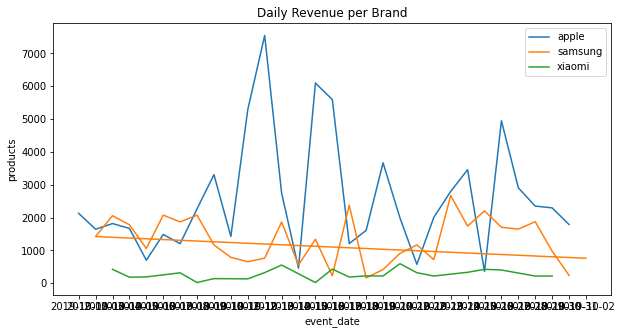

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.plot(df_ecomm_apple['event_date'], df_ecomm_apple['revenue'], label='apple')  
ax.plot(df_ecomm_samsung['event_date'], df_ecomm_samsung['revenue'], label='samsung')  
ax.plot(df_ecomm_xiaomi['event_date'], df_ecomm_xiaomi['revenue'], label='xiaomi')  


ax.set_xlabel('event_date')  
ax.set_ylabel('products')  
ax.set_title("Daily Revenue per Brand") 
ax.legend();  